In [158]:
# import all libraries which are going to use:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score


In [207]:
# Importing Car data set
car = pd.read_csv("CarPrice_Assignment.csv")

In [160]:
#fetch top 5 dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [161]:
# Get the details of car dataset
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [162]:
# Inspect the data type of car dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

<Figure size 1440x864 with 0 Axes>

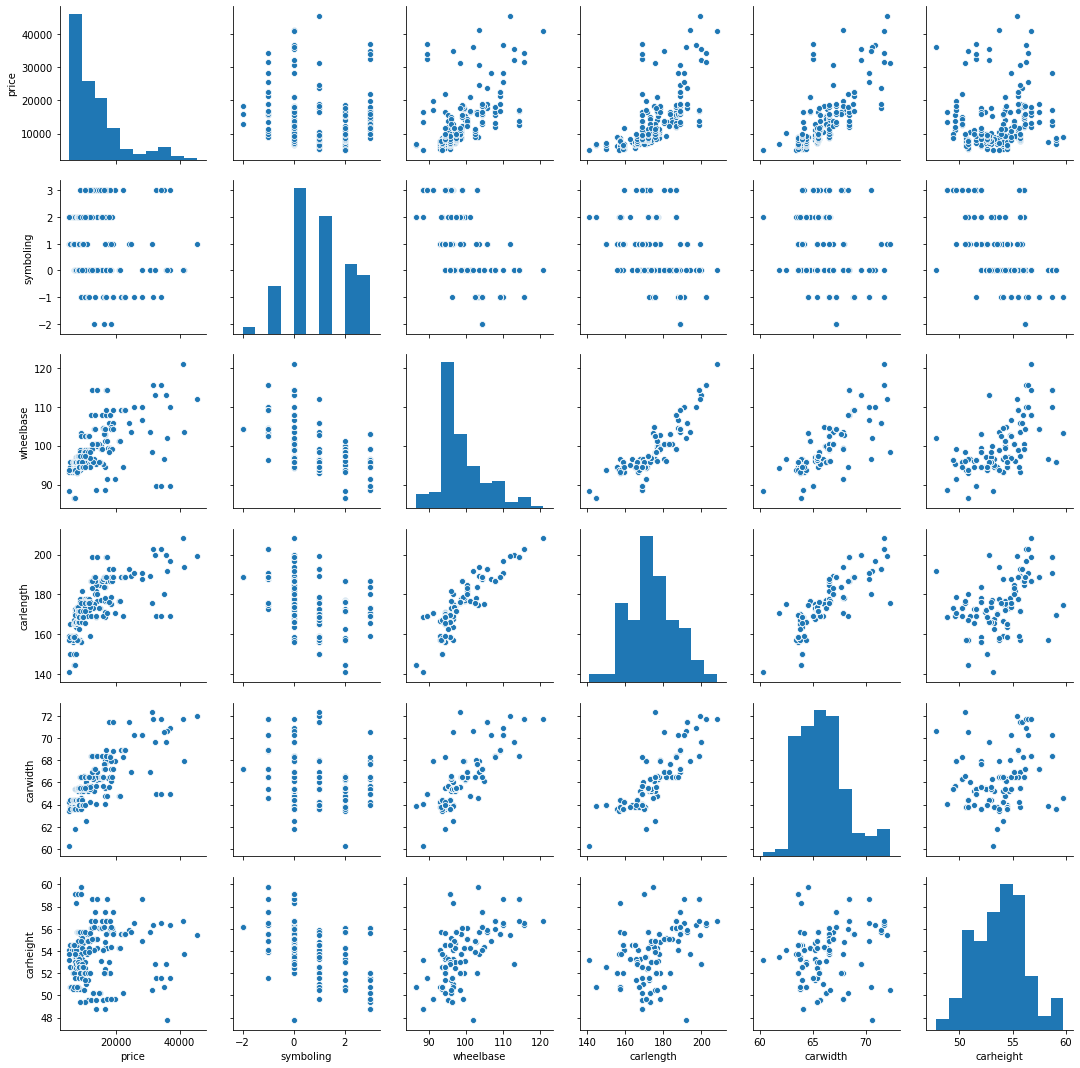

In [163]:
#Plot pairplot to get the insight of features with respect to "Price"
plt.figure(figsize=(20, 12))
sns.pairplot(car[["price","symboling","wheelbase","carlength","carwidth","carheight"]])

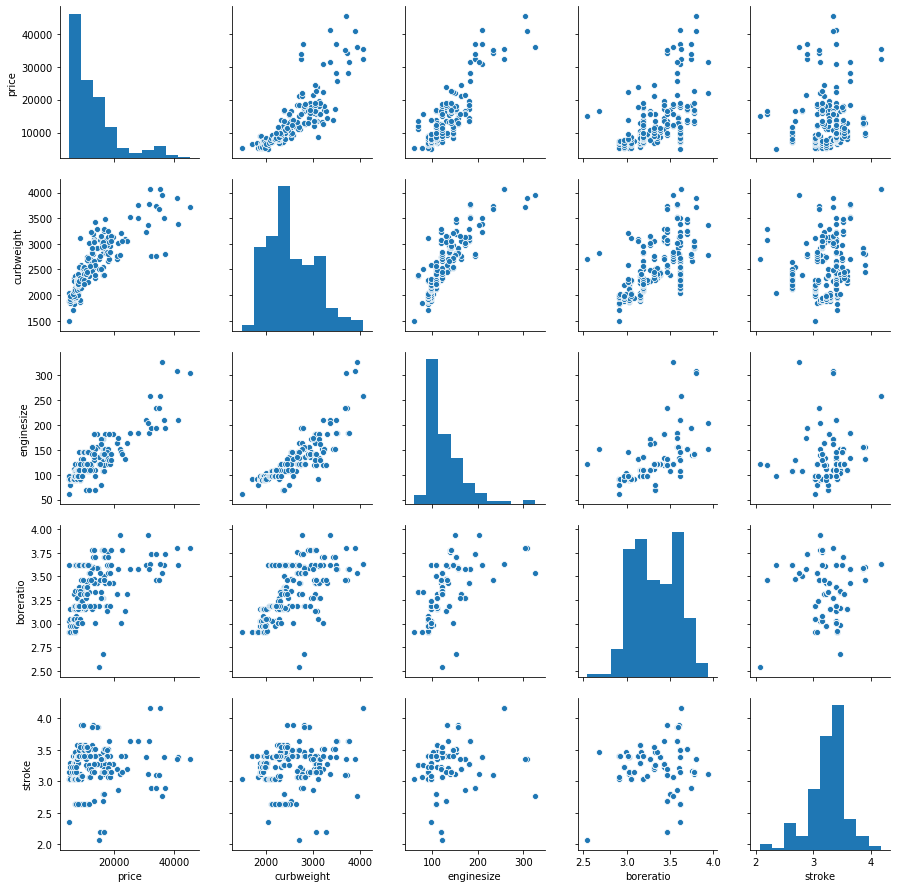

In [164]:
#Plot remaining featues with respect to Price
sns.pairplot(car[['price','curbweight', 'enginesize', 'boreratio', 'stroke']])

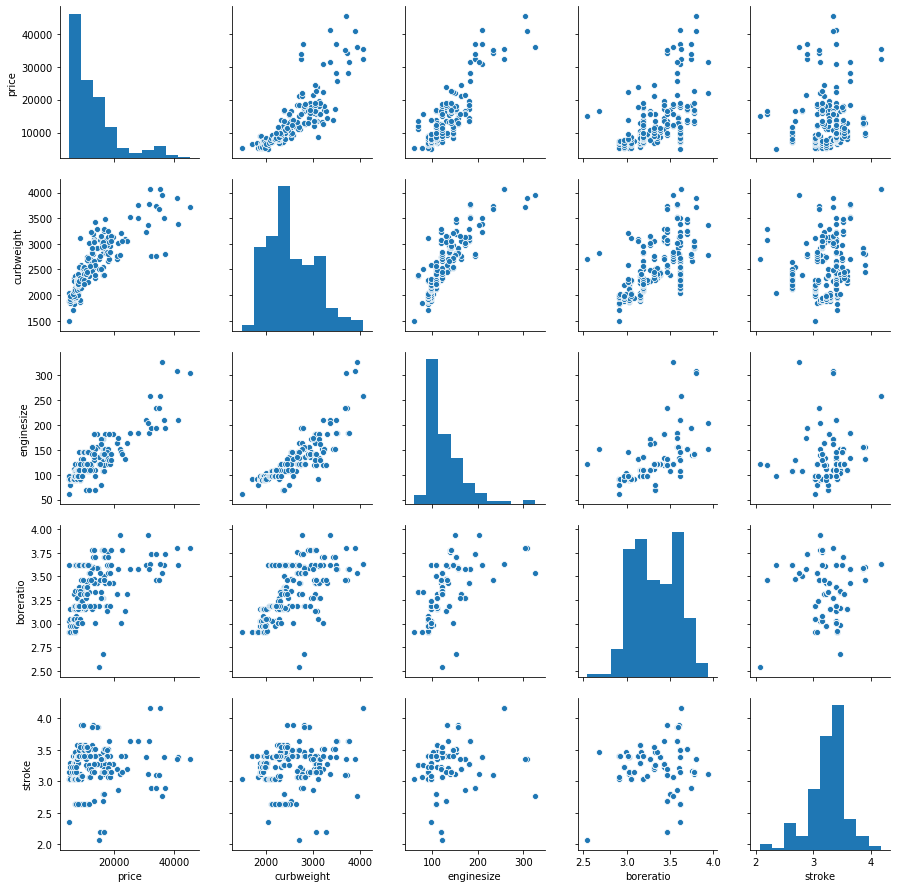

In [165]:
sns.pairplot(car[['price','curbweight', 'enginesize', 'boreratio', 'stroke']])

### Plot the categorical variables

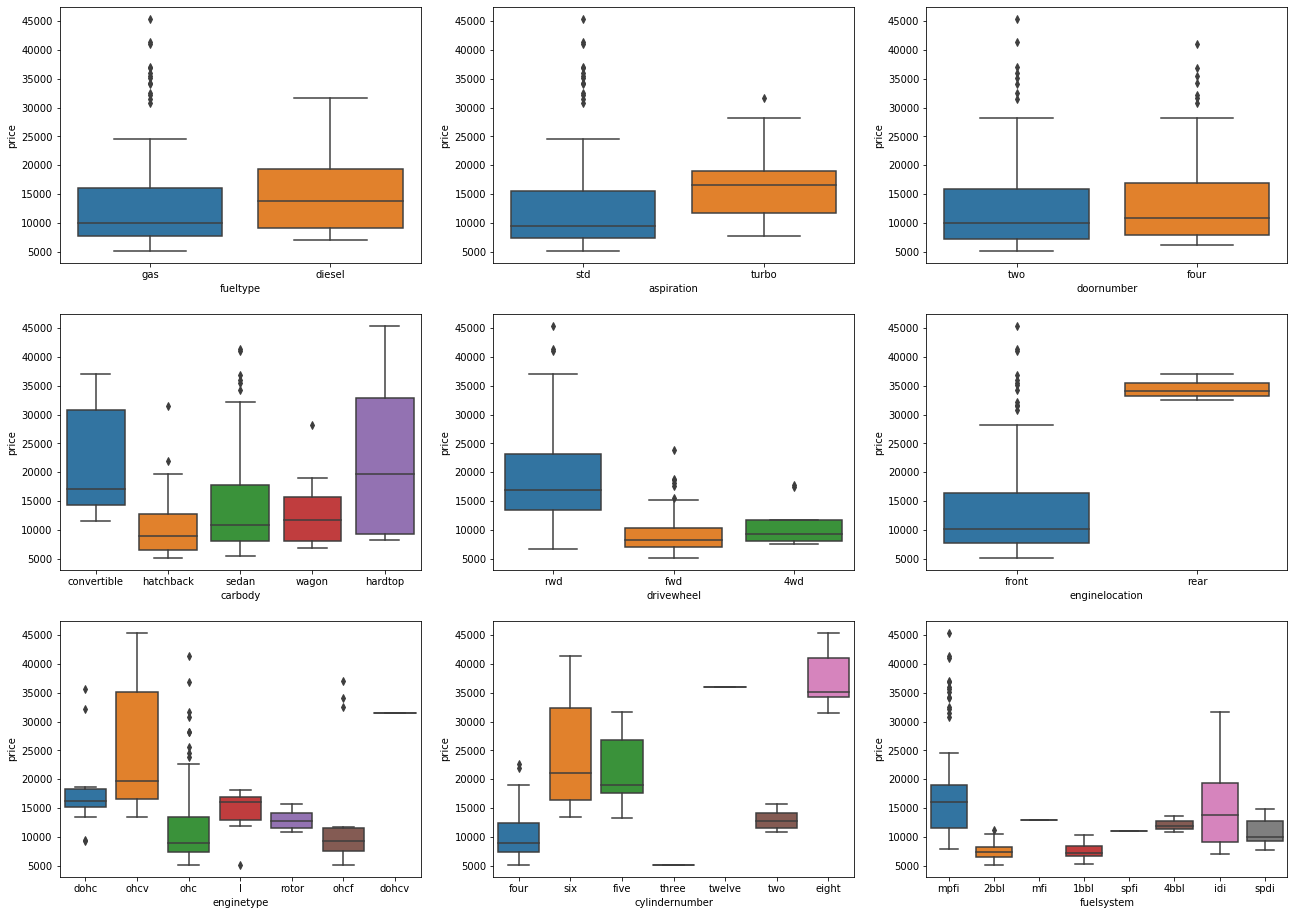

In [208]:
plt.figure(figsize=(22, 16))
plt.subplot(3,3,1)
#fuletype
sns.boxplot(x = 'fueltype', y = 'price', data = car)
#aspiration
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
#doornumber
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
#carbody
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = car)
#drivewheel
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
#enginelocation
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
#enginetype
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
#cylindernumber
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
#fuelsystem
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)

##### Heat map looks too meshy so i haven't included here.

In [ ]:
#Correct the typo in dataset
#Replace
car["drivewheel"]=car["drivewheel"].replace(["4wd"],["rwd"])
car.drivewheel.value_counts()

# List of variables to map

varlist =  ['fueltype', 'aspiration', 'doornumber', 'enginelocation','drivewheel']

# Defining the map function
def binary_map(x):
    return x.map({"std":1,"turbo":0,"two":1,"four":0,"front":1,"rear":0,"gas":1,"diesel":0,"rwd":1,"fwd":0})

# Applying the function to the housing list
car[varlist] = car[varlist].apply(binary_map)

In [167]:
#Review the dataset
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,1,1,hatchback,1,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,1,0,sedan,0,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,1,0,sedan,1,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [168]:
#Split carname
#CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet
car["CarName"]=[(re.split("\s",x))[0] for x in car["CarName"]]
car["CarName"] = car["CarName"].str.lower()
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,1,1,1,hatchback,1,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,1,0,sedan,0,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,1,0,sedan,1,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [169]:
#Correct the typo in Car company name
#First make all name into lower case
car["CarName"] = car["CarName"].str.lower()
#Replace with the correct name
car["CarName"]=car["CarName"].replace(["porcshce","vokswagen","alfa-romero","maxda","toyouta","vw"],["porsche","volkswagen","alfa-romeo","mazda","toyota","volkswagen"])
#Get the count of car company
car.CarName.value_counts()

toyota        32
nissan        18
mazda         17
honda         13
mitsubishi    13
subaru        12
volkswagen    12
peugeot       11
volvo         11
dodge          9
bmw            8
buick          8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
alfa-romeo     3
jaguar         3
chevrolet      3
renault        2
mercury        1
Name: CarName, dtype: int64

In [170]:
# Create Dummy Variables
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romeo,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romeo,1,1,1,convertible,1,1,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romeo,1,1,1,hatchback,1,1,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,1,1,0,sedan,0,1,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,1,1,0,sedan,1,1,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [171]:
# Get the dummy variables for the feature 'carbody' and store it in a new variable - 'carbodytype'
carbodytype = pd.get_dummies(car['carbody'],drop_first=True)
carbodytype.head()
# Add the results to the original car dataframe
car = pd.concat([car, carbodytype], axis = 1)
#Drop Carbody and Car_ID since it has no use 
car.drop(["carbody","car_ID"],inplace=True,axis=1)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon
0,3,alfa-romeo,1,1,1,1,1,88.6,168.8,64.1,...,9.0,111,5000,21,27,13495.0,0,0,0,0
1,3,alfa-romeo,1,1,1,1,1,88.6,168.8,64.1,...,9.0,111,5000,21,27,16500.0,0,0,0,0
2,1,alfa-romeo,1,1,1,1,1,94.5,171.2,65.5,...,9.0,154,5000,19,26,16500.0,0,1,0,0
3,2,audi,1,1,0,0,1,99.8,176.6,66.2,...,10.0,102,5500,24,30,13950.0,0,0,1,0
4,2,audi,1,1,0,1,1,99.4,176.6,66.4,...,8.0,115,5500,18,22,17450.0,0,0,1,0


In [172]:
# Get the dummy variables for the feature 'enginetype' and store it in a new variable - 'enginetype'
engine_type = pd.get_dummies(car['enginetype'],drop_first=True)
engine_type.head()
# Add the results to the original car dataframe
car = pd.concat([car, engine_type], axis = 1)
# Drop enginetype
car.drop(["enginetype"],inplace=True,axis=1)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,hardtop,hatchback,sedan,wagon,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,alfa-romeo,1,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romeo,1,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romeo,1,1,1,1,1,94.5,171.2,65.5,...,0,1,0,0,0,0,0,0,1,0
3,2,audi,1,1,0,0,1,99.8,176.6,66.2,...,0,0,1,0,0,0,1,0,0,0
4,2,audi,1,1,0,1,1,99.4,176.6,66.4,...,0,0,1,0,0,0,1,0,0,0


In [173]:
# Get the dummy variables for the feature 'cylindernumber' and store it in a new variable - 'carbodytype'
cylindernumber = pd.get_dummies(car['cylindernumber'],drop_first=True)
cylindernumber.head()
# Add the "cylindernumber" results to the original car dataframe
car = pd.concat([car, cylindernumber], axis = 1)
car.drop(["cylindernumber"],inplace=True,axis=1)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,alfa-romeo,1,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,3,alfa-romeo,1,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,1,alfa-romeo,1,1,1,1,1,94.5,171.2,65.5,...,0,0,1,0,0,0,1,0,0,0
3,2,audi,1,1,0,0,1,99.8,176.6,66.2,...,1,0,0,0,0,1,0,0,0,0
4,2,audi,1,1,0,1,1,99.4,176.6,66.4,...,1,0,0,0,1,0,0,0,0,0


In [174]:
# Get the dummy variables for the feature 'fuelsystem' and store it in a new variable - 'carbodytype'
fuelsystem = pd.get_dummies(car['fuelsystem'],drop_first=True)
fuelsystem.head()
# Add the "fuelsystem" results to the original car dataframe
car = pd.concat([car, fuelsystem], axis = 1)
car.drop(["fuelsystem"],inplace=True,axis=1)
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,alfa-romeo,1,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
1,3,alfa-romeo,1,1,1,1,1,88.6,168.8,64.1,...,0,0,0,0,0,0,0,1,0,0
2,1,alfa-romeo,1,1,1,1,1,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,audi,1,1,0,0,1,99.8,176.6,66.2,...,0,0,0,0,0,0,0,1,0,0
4,2,audi,1,1,0,1,1,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [175]:
# Get the dummy variables for the feature 'CarName' and store it in a new variable - 'carbodytype'
CarName = pd.get_dummies(car['CarName'],drop_first=True)
CarName.head()
# Add the "CarName" results to the original car dataframe
car = pd.concat([car, CarName], axis = 1)
car.drop(["CarName"],inplace=True,axis=1)
car.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,1,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,3,1,1,1,1,1,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,2,1,1,0,0,1,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,2,1,1,0,1,1,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


In [176]:
#Review Data type
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 64 columns):
symboling           205 non-null int64
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
drivewheel          205 non-null int64
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
hardtop             205 non-null uint8
hatchback           205 non-null uint8
sedan               2

### Splitting the Data into Training and Testing Sets

In [177]:
# We specify this so that the train and test data set always have the same rows, respectively
#train : 70%
#test : 30%

df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [178]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = MinMaxScaler()
#List the features which we are going to scale
num_vars = ['symboling','wheelbase','carlength', 'carwidth','carheight', 'curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']
#Perform fit and transform
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0.6,1,1,0,0,1,0.244828,0.426016,0.291667,0.265487,...,0,0,1,0,0,0,0,0,0,0
125,1.0,1,1,1,1,1,0.272414,0.452033,0.666667,0.212389,...,0,0,0,1,0,0,0,0,0,0
166,0.6,1,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
1,1.0,1,1,1,1,1,0.068966,0.450407,0.316667,0.088496,...,0,0,0,0,0,0,0,0,0,0
199,0.2,1,0,0,1,1,0.610345,0.775610,0.575000,0.858407,...,0,0,0,0,0,0,0,0,0,1


In [179]:
#All features are scaled between 0 - 1
df_train.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.909091,0.818182,0.440559,0.405594,0.993007,0.411141,0.525476,0.461655,0.509004,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,0.239200,0.288490,0.387050,0.498199,0.492733,0.083624,0.205581,0.204848,0.184517,0.215378,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,0.000000,1.000000,0.272414,0.399187,0.304167,0.353982,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,0.000000,1.000000,0.341379,0.502439,0.425000,0.522124,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,1.000000,1.000000,1.000000,1.000000,0.503448,0.669919,0.550000,0.668142,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing into X and Y sets for the model building

In [180]:
# Get price into y_train
y_train = df_train.pop('price')
# Get all features into X_train except price
X_train = df_train

Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

RFE
Recursive feature elimination

In [181]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE with top 25 features
rfe = RFE(lm, 25)             # running RFE
#Later, will reamove the features as per the observation
rfe = rfe.fit(X_train, y_train)

In [182]:
#List the rank of features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 28),
 ('fueltype', True, 1),
 ('aspiration', False, 2),
 ('doornumber', False, 39),
 ('drivewheel', False, 27),
 ('enginelocation', True, 1),
 ('wheelbase', False, 3),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('carheight', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 11),
 ('horsepower', False, 6),
 ('peakrpm', True, 1),
 ('citympg', False, 22),
 ('highwaympg', False, 12),
 ('hardtop', False, 16),
 ('hatchback', False, 15),
 ('sedan', False, 17),
 ('wagon', False, 18),
 ('dohcv', True, 1),
 ('l', True, 1),
 ('ohc', False, 35),
 ('ohcf', True, 1),
 ('ohcv', False, 24),
 ('rotor', True, 1),
 ('five', True, 1),
 ('four', True, 1),
 ('six', False, 14),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', True, 1),
 ('2bbl', False, 19),
 ('4bbl', False, 25),
 ('idi', True, 1),
 ('mfi', False, 36),
 ('mpfi', False, 34),
 ('spdi', False, 26),
 ('spfi', False, 37),
 ('au

In [183]:
#Features are selected for training 
col = X_train.columns[rfe.support_]
col

Index(['fueltype', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'peakrpm', 'dohcv', 'l', 'ohcf', 'rotor', 'five',
       'four', 'three', 'twelve', 'two', 'idi', 'bmw', 'mitsubishi', 'peugeot',
       'porsche', 'saab', 'subaru', 'volvo'],
      dtype='object')

In [184]:
#Features are NOT selected for training 
X_train.columns[~rfe.support_]

Index(['symboling', 'aspiration', 'doornumber', 'drivewheel', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'citympg',
       'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon', 'ohc', 'ohcv',
       'six', '2bbl', '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'nissan', 'plymouth', 'renault', 'toyota', 'volkswagen'],
      dtype='object')

Building model using statsmodel, for the detailed statistics

In [185]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     118.4
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.18e-70
Time:                        19:45:29   Log-Likelihood:                 236.50
No. Observations:                 143   AIC:                            -429.0
Df Residuals:                     121   BIC:                            -363.8
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0721      0.035     -2.

R-squared and Adj. R-squared are good but P-value seems to be high

In [186]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,l,inf
15,three,inf
2,enginelocation,inf
24,subaru,inf
18,idi,inf
17,two,inf
21,peugeot,inf
11,ohcf,inf
12,rotor,inf
1,fueltype,inf


#### vif is infinite for :"l","three","enginelocation","subaru","idi","two","peugeot","ohcf","rotor","fueltype
Lets drop these features since infinite VIF value indicates that the corresponding variable may be expressed exactly by a linear combination of other variables

In [187]:
#Drop
X_train_new = X_train_rfe.drop(["l","three","enginelocation","subaru","idi","two","peugeot","ohcf","rotor","fueltype"], axis = 1)

In [188]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     83.54
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.51e-58
Time:                        19:45:29   Log-Likelihood:                 187.53
No. Observations:                 143   AIC:                            -343.1
Df Residuals:                     127   BIC:                            -295.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0879      0.042     -2.090      0.0

In [189]:
# Calculate the VIFs for the new model
X_train_new = X_train_new.drop(['const'], axis=1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,44.33
0,carwidth,41.08
2,enginesize,26.20
3,boreratio,18.60
4,stroke,17.09
8,four,8.10
5,peakrpm,4.89
12,porsche,1.92
7,five,1.77
9,twelve,1.72


### VIF is quite high drop it one by one, and observe the result

In [190]:
X_train_new = X_train_new.drop(["twelve"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     90.14
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.80e-59
Time:                        19:45:30   Log-Likelihood:                 187.48
No. Observations:                 143   AIC:                            -345.0
Df Residuals:                     128   BIC:                            -300.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0879      0.042     -2.097      0.0

#### Dropping the Variable and Updating the Model

In [191]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,28.04
2,boreratio,15.88
3,stroke,13.96
1,enginesize,13.37
7,four,7.07
4,peakrpm,4.64
10,porsche,1.81
6,five,1.76
5,dohcv,1.62
8,bmw,1.20


In [192]:
X_train_new = X_train_new.drop(["carwidth"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,stroke,12.48
1,boreratio,12.35
0,enginesize,9.99
6,four,7.07
3,peakrpm,4.52
9,porsche,1.75
4,dohcv,1.52
5,five,1.44
7,bmw,1.19
11,volvo,1.17


In [193]:
#Dropping the Variable and Updating the Model
X_train_new = X_train_new.drop(["stroke"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,boreratio,12.17
0,enginesize,6.63
5,four,5.13
2,peakrpm,3.52
8,porsche,1.70
3,dohcv,1.51
4,five,1.31
6,bmw,1.19
10,volvo,1.16
7,mitsubishi,1.12


In [194]:
#Dropping the Variable and Updating the Model
X_train_new = X_train_new.drop(["boreratio"], axis = 1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,3.52
4,four,2.90
0,enginesize,2.42
7,porsche,1.61
2,dohcv,1.51
3,five,1.26
5,bmw,1.17
6,mitsubishi,1.11
9,volvo,1.09
8,saab,1.04


In [195]:
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     84.36
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.39e-52
Time:                        19:45:30   Log-Likelihood:                 159.97
No. Observations:                 143   AIC:                            -297.9
Df Residuals:                     132   BIC:                            -265.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0052      0.041      0.128      0.8

##### We can rely on this model, let do the residual analysis

### Residual Analysis of the train data

In [196]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

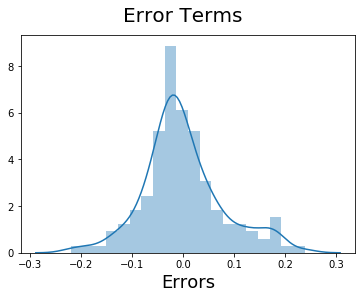

In [197]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions

In [198]:
# Perform testing on test dataset
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','wheelbase','carlength', 'carwidth','carheight', 'curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
160,0.4,1,1,0,0,1,0.313793,0.409756,0.341667,0.460177,...,0,0,0,0,0,0,0,1,0,0
186,0.8,1,1,0,0,1,0.368966,0.497561,0.433333,0.699115,...,0,0,0,0,0,0,0,0,1,0
59,0.6,1,1,1,0,1,0.420690,0.596748,0.516667,0.522124,...,0,0,0,0,0,0,0,0,0,0
165,0.6,1,1,1,1,1,0.272414,0.448780,0.308333,0.424779,...,0,0,0,0,0,0,0,1,0,0
140,0.8,1,1,1,1,1,0.231034,0.263415,0.291667,0.699115,...,0,0,0,0,0,0,1,0,0,0


In [199]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.887097,0.822581,0.435484,0.435484,0.967742,0.437764,0.559481,0.480376,0.559663,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.271724,0.319058,0.385142,0.499868,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,1.000000,0.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.384956,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,1.000000,1.000000,0.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.588496,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.699115,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [200]:
#Dividing into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [201]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [202]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

Text(0, 0.5, 'y_pred')

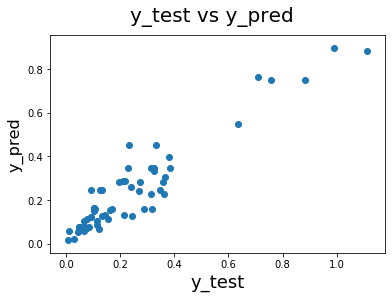

In [203]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

### Calculate the R-squared score on the test set.

In [204]:
r2_score(y_test, y_pred)

0.8850033368186343

### R-Square: 0.8850033368186343